## 0. 앞 내용 복습

### 0.1. 그래프 : 노드와 노드사이에 연결된 간선의 정보를 가지고 있는 자료구조
'서로 다른 개체가 연결되어 있다', '여러 개의 도시가 연결되어 있다' -> 그래프 문제를 생각해볼 것

최단 경로 문제를 찾을 때 
- 노드의 개수가 <U>적으면 **플로이드-워셜**</U>, 
- 노드의 개수가 <U>많으면 **다익스트라**</U>가 더 유용

#### 0.1.1. 인접(adjacency) 행렬 - "노드 개수 적을수록 유리"
- **2차원 배열로 그래프의 연결 관계 표현**      
- Ex) graph = [[0,7,5], [7,0,INf],  [5,INF,0]]
- 단점
    - 이 방식은 모든 관계를 저장하므로 노드 개수가 많을수록 메모리 낭비
- 장점
    - 인접 리스트의 단점
    - Ex) 노드 1과 노드 7의 연결 상태 확인 => graph[1][7]
#### 0.1.2. 인접(adjacency) 리스트 - "노드 개수 많을수록 유리"
- **리스트로 그래프의 연결 관계 표현**
- **연결 리스트**라는 자료구조 이용     
- 장점
    - 연결된 정보만 저장하여 메모리 효율적 사용
- 단점
    - 특정 두 노드가 연결되어 있는지에 대한 정보를 얻는 속도 느림(연결된 데이터를 하나씩 확인해야 함)

### 0.2. 다익스트라(by 우선순위 큐)
- 시작점 -> 다른 각각의 노드로 가는 최단 경로 구하기
- 인접 리스트 사용
    - 노드 개수 V일 떄 V개 리스트 만들어 각 노드의 간선 정보 저장
### 0.3. 워셜-플로이드(by 인접 행렬)
- 모든 노드 -> 각각 다른 노드까지 최단 경로

## 1. 기타 그래프

### 1.1. 서로소 집합(Union-find) : 공통 원소가 없는 두 집합의 원소들을 처리하기 위한 자료구조
- union과 find 이 2개의 연산으로 서로소 집합 자료구조 만듬
    - `union(합집합)` : 2개의 원소가 포함된 집합을 하나의 집합으로 합치기
    - `find(찾기)` : 특정한 원소가 속한 집합이 어떤 집합인지 알려줌
- 트리 자료구조 이용
- `Algorithms`
    1. `Union`통해 연결된 두 노드 A,B 확인
        1. A,B 각각의 루트 노드 A', B' 찾기
        2. A'를 B'의 부모 노드로 설정(이때, B'가 A'를 가리키도록 함)
            - A', B'중에서 더 번호가 작은 원소가 부모 노드가 되도록 구현()
    2. 모든 `Union` 연산 처리할 때까지 **1번** 반복

#### 1.1.1. find함수로 경로 압축 기법(Path compression)

In [ ]:
#특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    #루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x]!=x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

#두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    #숫자가 더 작은 노드가 부모가 된다
    if a < b:
        parent[b] = a
    else:
        parent[a] = b


#노드 개수 v, 간선(union 연산)개수 e
v, e = map(int, input().split())
parent = [0]*(v+1)

#부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

#union 연산 수행
for _ in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

#각 원소가 속한 집합 출력
for i in range(1,v+1):
    print(find_parent(parent, i), end=' ')
print()

#부모 테이블 내용 출력
for i in range(1,v+1):
    print(parent[i], end = ' ')

#### 1.1.2. 서로소 집합 코드로 그래프 내의 사이클 판별     
`Algorithms`
1. 각 간선을 확인하면서 두 노드의 루트 노드 확인
    - 루트 노드가 서로 다르면 => 두 노드에 대해 `Union`    
    - 루트 노드가 서로 같다면 => 사이클 발생
2. 그래프에 포함되어 있는 모든 간선에 대해 1번 과정 반복

##### Ex
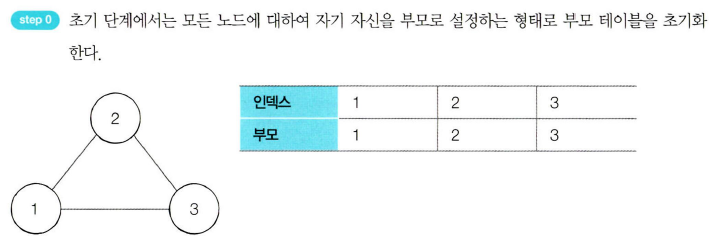      

Step 1. 간선(1,2) => [인덱스, 부모] = [1,1],[2,1],[3,3]     

Step 2. 간선(1,3) => [인덱스, 부모] = [1,1],[2,1],[3,1]     

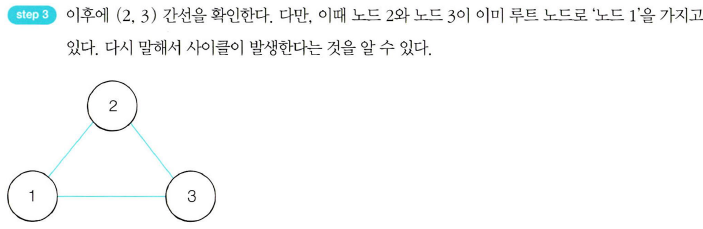

In [ ]:
#특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    #루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x]!=x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

#두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    #숫자가 더 작은 노드가 부모가 된다
    if a < b:
        parent[b] = a
    else:
        parent[a] = b


#노드 개수 v, 간선(union 연산)개수 e
v, e = map(int, input().split())
parent = [0]*(v+1)

#부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

cycle = False

for _ in range(e):
    a, b = map(int, input().split())
    #사이클이 발생한 경우, 종료
    if find_parent(parent, a)==find_parent(parent, b):
        cycle = True
        break
    #발생하지 않았으면 union 수행
    else:
        union_parent(parent, a, b)

print(cycle)

### 1.2 **신장 트리** : 하나의 그래프가 있을 때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분의 그래프
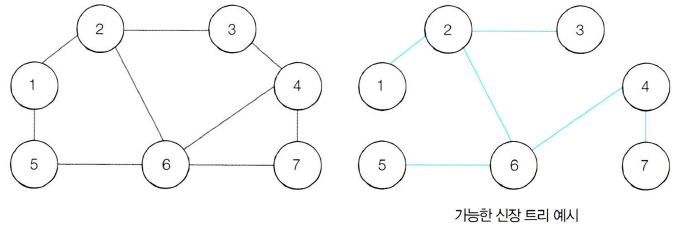      

- `크루스칼` : 대표적인 **최소 신장 트리 알고리즘**(=최소 비용으로 만들 수 있는 신장트리를 찾는 그리디 알고리즘)      
    1. 간선 데이터를 비용에 따라 오름차순 정렬      
    2. 간선 하나씩 확인하며 현재 간선이 사이클을 발생시키는지 확인      
        - 사이클 발생X) 최소 신장 트리에 포함 O => `Union`      
        - 사이클 발생O) 최소 신장 트리에 포함 X => 생략
    3. 모든 간선에 대해 2번 과정 반복       
- **시간복잡도** : O(ElogE)

In [ ]:
#특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    #루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x]!=x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

#두 원소가 속한 집합 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    #숫자가 더 작은 노드가 부모가 된다
    if a < b:
        parent[b] = a
    else:
        parent[a] = b


#노드 개수 v, 간선(union 연산)개수 e
v, e = map(int, input().split())
parent = [0]*(v+1)

edges = []
result = 0

#부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

#간선에 대한 비용 입력받기, 비용순으로 정렬하기 위해 튜플의 첫 번째 원소를 비용으로 설정
for _ in range(e):
    a, b, c = map(int, input().split())
    edges.append((c, a, b))

edges.sort()
for edge in edges:
    c, a, b = edge
    #사이클이 발생하지 않는다면
    if find_parent(parent, a)!=find_parent(parent, b):
        union_parent(parent, a, b)
        result += c

print(result)

### **1.3 위상 정렬(Topology sort)** : 방향 그래프의 모든 노드를 방향성에 거스르지 않도록 순서대로 나열하는 것, 순서가 정해져있는 작업을 차례대로 수행할 때 사용
- **Indegree(진입차수)** : 특정 노드에 들어오는 간선의 개수
- **Algorithms**
    1. 진입차수가 0인 노드를 큐에 넣음
    2. 큐가 빌 때까지 다음 과정 반복
        - 큐에서 원소 꺼내 해당 노드에서 출발하는 간선을 그래프에서 제거
        - 새롭게 진입차수가 0이 된 노드를 큐에 넣음
    3. **큐에서 빠져나간 노드 순서대로 출력 = 위상 정렬 수행 결과**
- 큐에서 원소가 V번 추출되기 전에 큐가 비어버리면 사이클 발생
- **시간 복잡도** : O(V+E)
- **EX)**       

    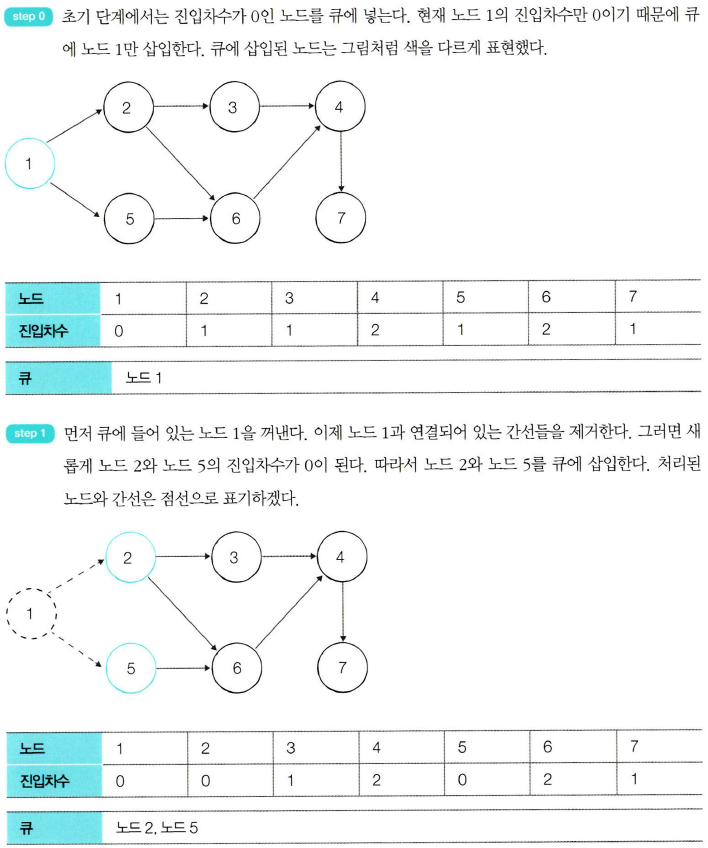      
    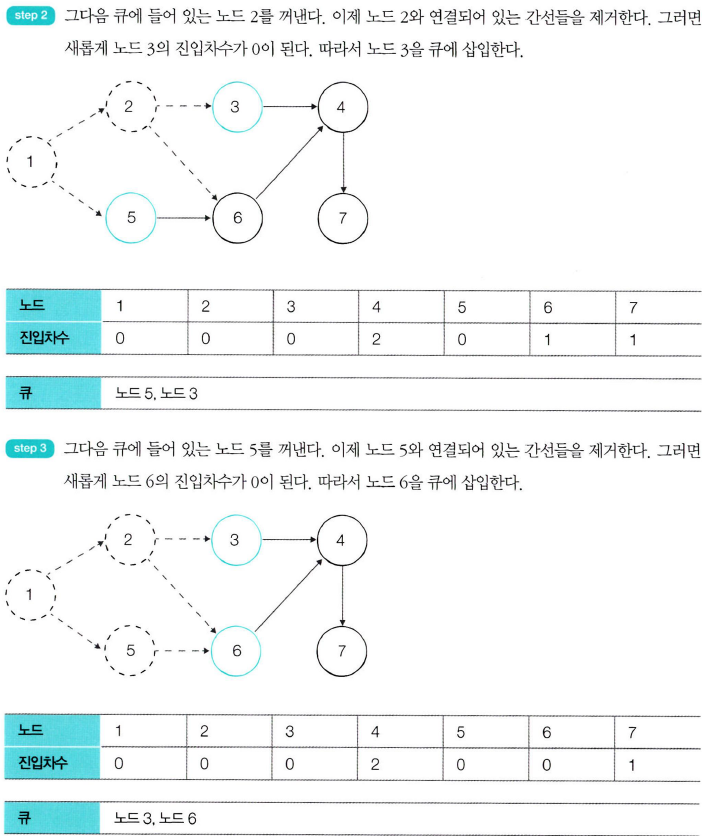      
    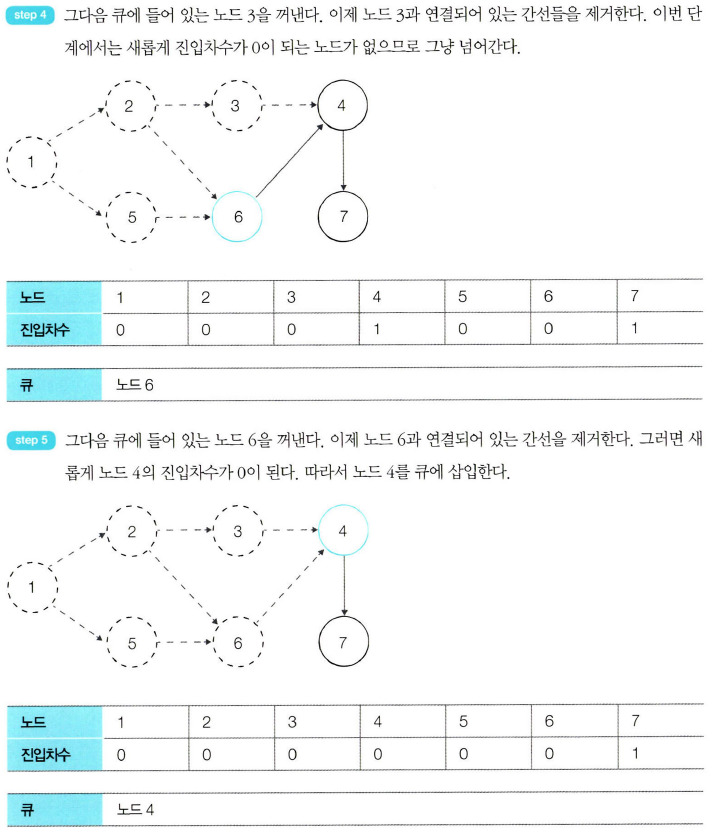      
    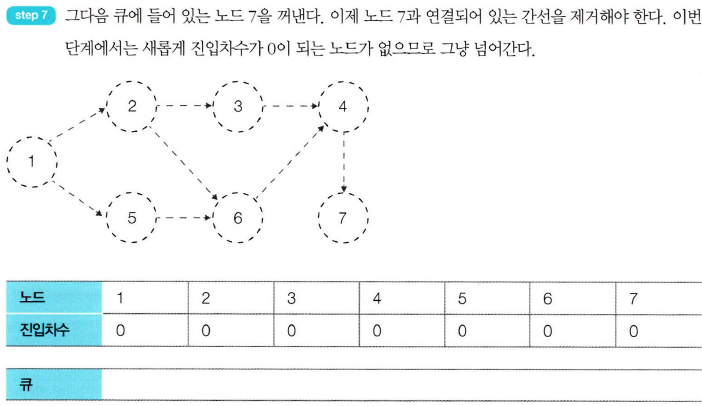

In [ ]:
from collections import deque

v,e = map(int, input().split())
#모든 노드에 대한 진입차수를 0으로 초기화
indegree = [0]*(v+1)
#각 노드에 연결된 간선 정보를 담기 위한 그래프 초기화
graph = [[] for _ in range(v+1)]

#간선 정보 입력받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b)
    indegree[b] += 1

def topoplogy_sort():
    result = []
    q = deque()

    #진입차수가 0인 노드를 큐에 삽입
    for i in range(1,v+1):
        if indegree[i]==0:
            q.append(i)

    while q:
        now = q.popleft()
        result.append(now)
        for i in graph[now]:
            indegree[i] -= 1
            if indegree[i] == 0:
                q.append(i)

    #위상 정렬 수행 결과 출력력
    for i in result:
        print(i, end= ' ')

topoplogy_sort()